# matplotlib Challenge

## Serena Gestring - 2/15/25

First I will begin this challenge by importing the necessary modules: pandas and matplotlib.pyplot

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Directory of Visualizations - Grouped Bars

Web analytics provides insights into user behavior on a website by recording and analyzing different metrics related to their use. This information can be used to make improvements to the website's content, organization, and overall user experience. For my future career in web development, web analytics will be important for tracking the performance of my websites and how I can improve them. 

One of the metrics that can be analyzed is page views, or how many times a page has been viewed by users. Because many websites are structured into sections of main pages that each contain subpages, I think you could easily use grouped bars to visualize the number of views for subpages grouped by their parent pages/sections (where each section is represented by a different color to easily identify to whom each page belongs). That would allow you to see the views for each individual page but also identify any overall patterns between the larger sections (e.g., one particular section's subpages are being vieweed more frequently than those in any other section). This would work well for a small website that doesn't have that many total pages, but I recognize that this would become too much for a large website with dozens of pages, in which case it would probably make sense to just do one bar chart per section/parent page rather than try to represent all pages in only one graph.

## Import CSV Data File

Next I loaded in the required CSV file and converted it to a DataFrame object. I then viewed the head of the DataFrame to ensure the data has been loaded correctly. 

In [2]:
cces = pd.read_csv('cces_example_data.csv')
cces.head()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasParty,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid
0,2,6,2,2,1,56,6,1,1,1.000000,...,-99,-99,-96,2.666667,1.000000,5.00,4.857143,0,0.505028,1231308943
1,2,4,2,5,1,53,13,1,2,3.000000,...,-100,-100,-100,2.000000,2.000000,5.00,5.000000,0,0.852381,1232300315
2,1,2,1,2,1,69,10,2,5,4.333333,...,99,99,96,1.000000,1.000000,5.00,5.000000,2,1.320189,1232358697
3,2,3,1,6,1,76,97,1,3,1.000000,...,-86,-91,-89,4.666667,1.333333,4.25,4.428571,0,0.519198,1232540961
4,4,5,2,6,1,83,4,1,2,1.000000,...,-80,-88,-87,4.666667,3.666667,4.25,5.000000,0,1.154005,1232580601


## Empty Figure Two Axes

Below I have created one figure that consists of two axes. The first axes is labeled as "Age Histogram" and the second axes is labeled as "Political Identity" per assignment instructions.

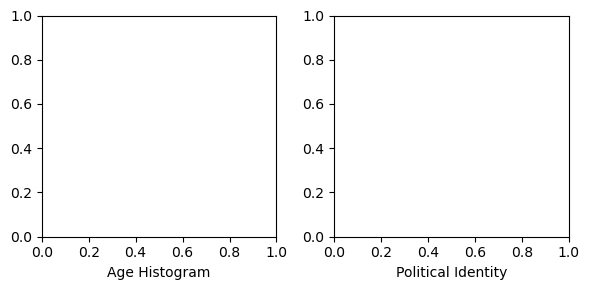

In [3]:
fig1, axs1 = plt.subplots(1, 2, figsize = (6, 3))
axs1[0].set_xlabel('Age Histogram')
axs1[1].set_xlabel('Political Identity')

plt.tight_layout()
plt.show()

## Bar Plot

In order to create a bar plot that displays the frequencies of responses in the "Evaluation" variable, I first need to summarize the necessary data from the DataFrame so it can be visualized. I can do this using .groupby() and .count(), and then finding the .index and .values of the resulting summarized data. 

In [4]:
eval_counts = cces.groupby('Evaluation').count()['caseid']
eval_counts

Evaluation
0    365
1     48
2    202
3     44
Name: caseid, dtype: int64

In [5]:
eval_counts.index

Index([0, 1, 2, 3], dtype='int64', name='Evaluation')

In [6]:
eval_counts.values

array([365,  48, 202,  44])

I can now add this information into the bar plot to create the visualization below. It is very easy to see that the evaluation value with the highest frequency is 0, and while I know from the eval_counts variable that the evaluation with the lowest frequency is 3, in the visualization it is difficult to tell since 2 is very close in frequency to 3. 

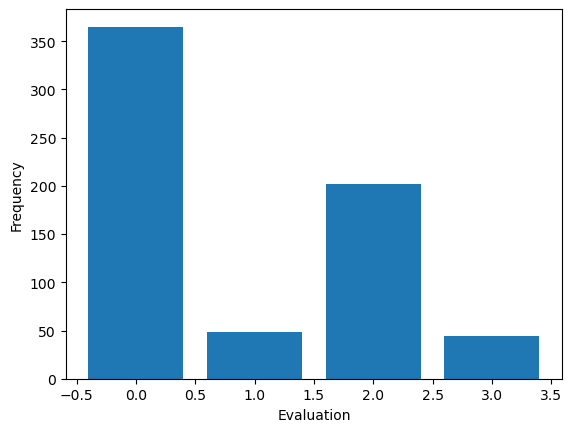

In [7]:
fig2, ax2 = plt.subplots()
ax2.bar(x = eval_counts.index, height = eval_counts.values)
ax2.set_xlabel('Evaluation')
ax2.set_ylabel('Frequency')

plt.show()

## Scatter Plot

Below is the initial scatter plot created to display the relationship between the ConMediaUse variable and ImmiPhobia variable. 

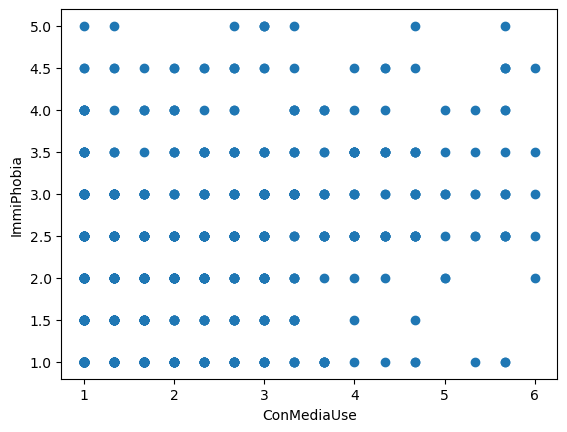

In [8]:
fig3, ax3 = plt.subplots()
ax3.scatter(cces['ConMediaUse'], cces['ImmiPhobia'])
ax3.set_xlabel('ConMediaUse')
ax3.set_ylabel('ImmiPhobia')

plt.show()

## Improving the Scatter Plot

Right away, there is a major problem with this scatter plot. The dots each represent an observation from the DataFrame. However, I know from the original DataFrame that there is over 650 observations in the data (confirmed by the .tail() below) but there is clearly not 650 dots on the scatterplot. This is because many of the dots are overlapping each other, obscuring a lot of the data. 

We talked about this problem in class and it was discussed in one of the readings this week, Wilke Chapter 18. We can start to solve this problem by adding some transparency to each individual point on the chart, which allows "overplotted points [to] appear as darker points and thus the shade of the points reflects the density of points in that location of the graph” (Wilke, 2019, para. 3). However, it still might be difficult to tell how many points could be stacked on top of each other specifically, so we can also add some jitter to the data points. This would “displace each point randomly by a small amount in either the x or the y direction or both” and make it more apparent how many points are overlapping at a particular point (Wilke, 2019, para. 4). Therefore, adding transparency and a slight jitter to our points in the scatter plot would give us a much clearer representation of how many observations are truly being represented in the chart. This then allows us a greater ability to identify patterns and meaning in the data being displayed than the current scatter plot allows us.

**References**

Wilke, R. O. (2019). Handling overlapping points. Fundamentals of data visualization: A primer on making informative and compelling figures (paras. 3-4). O’Reilly, https://clauswilke.com/dataviz/overlapping-points.html.

In [9]:
cces.tail()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasParty,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid
654,1,5,2,2,2,30,4,1,1,2.666667,...,-79,-90,-67,1.666667,1.666667,3.00,3.000000,3,1.182346,1259989749
655,2,2,1,4,1,19,97,1,1,1.000000,...,-49,-25,-7,2.666667,1.000000,3.75,4.714286,0,0.660217,1260782541
656,4,6,1,3,1,20,7,1,1,1.000000,...,-47,-47,-41,4.666667,4.666667,5.00,4.285714,0,1.027184,1260840787
657,2,2,1,3,1,23,5,2,4,3.666667,...,40,99,94,2.000000,2.333333,2.50,3.000000,2,1.433068,1261039231
658,2,2,1,3,1,23,5,2,4,3.666667,...,40,99,94,2.000000,2.333333,2.50,3.000000,2,1.433068,1261039231


## Attempt to Improve the Scatter Plot

While this is not part of the assignment, I wanted to look at the documentation and see if I could figure out how to make these changes to the current scatter plot just for fun. 

I found that the alpha parameter allows you to set transparency between 0 (completely transparent) and 1 (completely opaque, so I tried to implement this parameter using a an example from this [reference page](https://labex.io/tutorials/matplotlib-ways-to-set-a-color-s-alpha-value-48922). 

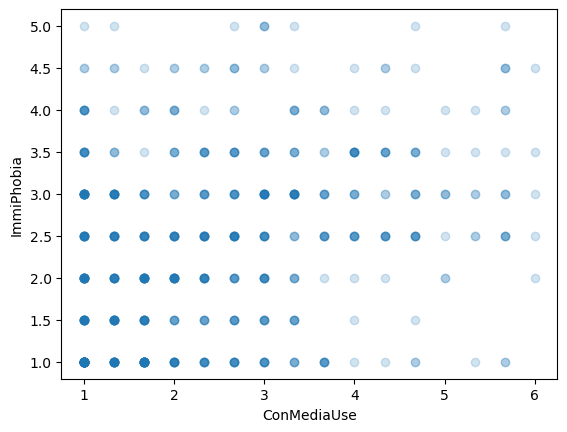

In [13]:
fig4, ax4 = plt.subplots()
ax4.scatter(cces['ConMediaUse'], cces['ImmiPhobia'], alpha = 0.2)
ax4.set_xlabel('ConMediaUse')
ax4.set_ylabel('ImmiPhobia')

plt.show()

Like the reading described, the above scatter plot is better than the first one but a lot of the data is still obscured. I had a hard time finding any helpful documentation about implementing jitter in matplotlib, so I decided to look back through my own jupyter notebooks from when I took Data in EMAT two years ago to see if I could find any examples of jitter in my old code, and I actually [found one](https://github.com/sgestri1/interactive-data-sp25/blob/main/11-17_inclass.ipynb). Using this old notebook as an example, I tried to apply the jitter method from that notebook to this scatter plot. I had to import numpy in order to do it.

In [14]:
import numpy as np

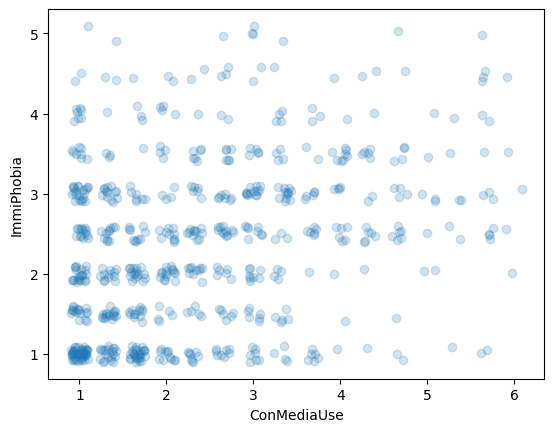

In [17]:
fig5, ax5 = plt.subplots()
x_jitter = np.random.uniform(-0.10, 0.10, len(cces['ConMediaUse']))
y_jitter = np.random.uniform(-0.10, 0.10, len(cces['ImmiPhobia']))
ax5.scatter(cces['ConMediaUse'] + x_jitter, cces['ImmiPhobia'] + y_jitter, alpha = 0.2)
ax5.set_xlabel('ConMediaUse')
ax5.set_ylabel('ImmiPhobia')

plt.show()

And it worked! This scatter plot is much more informative that the first one thanks to transparency and jitter. Now we can see that the points around (1,1) are the densest.